In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud


In [2]:
df = pd.read_csv('./10-spam/spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df["v2"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
grouped = df.groupby("v1").count()
grouped

,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
v1,,,,
ham,4825,45,10,6
spam,747,5,2,0


<Axes: >

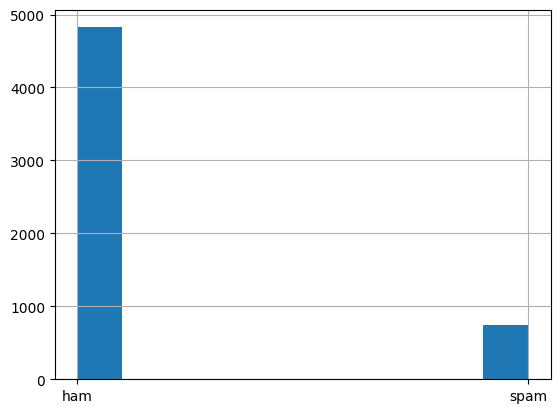

In [8]:
df["v1"].hist()

In [9]:
# Crear etiquetas binarias
df["b_labels"] = df["v1"].map({"ham": 0, "spam": 1})
Y = df["b_labels"].to_numpy()

In [10]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0


In [11]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
df_train,df_test,Ytrain,Ytest = train_test_split(df["v2"], Y, test_size=0.33)

In [13]:
df_train

1058    Tell me they're female :V how're you throwing ...
1316                 Why nothing. Ok anyway give me treat
2054        Y so late but i need to go n get da laptop...
3082               K..k:)how about your training process?
3548    I got like $ &lt;#&gt; , I can get some more l...
                              ...                        
2456                            Onum ela pa. Normal than.
3770    Hi, wlcome back, did wonder if you got eaten b...
5452             What???? Hello wats talks email address?
4666                           I send the print  outs da.
3056    Just woke up. Yeesh its late. But I didn't fal...
Name: v2, Length: 3733, dtype: object

In [14]:
df_test

2486           I dont thnk its a wrong calling between us
3594     Huh but i cant go 2 ur house empty handed right?
1822        If you're thinking of lifting me one then no.
4101    Ok then i will come to ur home after half an hour
5257       As usual..iam fine, happy &amp; doing well..:)
                              ...                        
4092    \Life is nothing wen v get everything\". But \...
1724              There bold 2  &lt;#&gt; . Is that yours
1264                           I will see in half an hour
5313             My sister going to earn more than me da.
1246    I do know what u mean,  is the king of not hav...
Name: v2, Length: 1839, dtype: object

In [15]:
vectores = CountVectorizer(decode_error="ignore")
Xtrain = vectores.fit_transform(df_train)
Xtest = vectores.transform(df_test)

In [16]:
Xtrain

<3733x7002 sparse matrix of type '<class 'numpy.int64'>'
	with 49393 stored elements in Compressed Sparse Row format>

In [17]:
Xtest

<1839x7002 sparse matrix of type '<class 'numpy.int64'>'
	with 22625 stored elements in Compressed Sparse Row format>

In [18]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train acc: ", model.score(Xtrain,Ytrain))
print("test acc: ", model.score(Xtest, Ytest))

train acc:  0.993838735601393
test acc:  0.9874932028276238


In [19]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("train F1: ", f1_score(Ytrain, Ptrain))
print("test F1: ", f1_score(Ytest, Ptest))

train F1:  0.9760166840458812
test F1:  0.9555125725338491


In [20]:
cm = confusion_matrix(Ytrain, Ptrain)
cm

array([[3242,    9],
       [  14,  468]], dtype=int64)

In [21]:
cm = confusion_matrix(Ytest, Ptest)
cm

array([[1569,    5],
       [  18,  247]], dtype=int64)

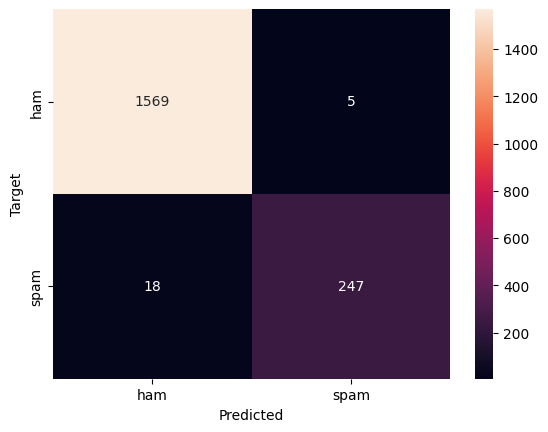

In [22]:
def plot_cm(cm):
    clases = ["ham", "spam"]
    df_cm = pd.DataFrame(cm, index=clases, columns=clases)
    ax = sn.heatmap(df_cm, annot=True, fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
    
plot_cm(cm)

In [23]:
# visualize the data
def visualize(label):
    words = ""
    for msg in df[df["v1"] == label]["v2"]:
        msg = msg.lower()
        words += msg + " "
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

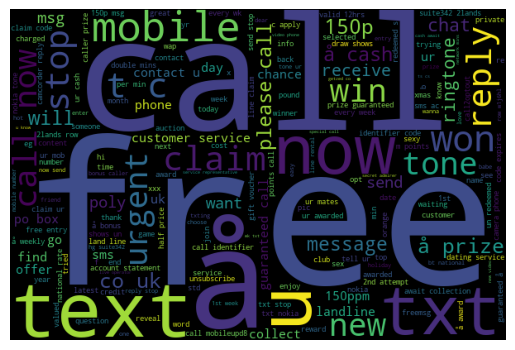

In [24]:
visualize("spam")

In [25]:
X = vectores.transform(df["v2"])
df["predictions"] = model.predict(X)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN,1,1
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN,0,0
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN,0,0
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN,0,0


In [28]:
falso_spam = df[(df["predictions"] == 1) & (df["b_labels"] == 0)]["v2"]
for msg in falso_spam:
    print(msg)

Yes:)from last week itself i'm taking live call.
Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Yavnt tried yet and never played original either
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Dhoni have luck to win some big title.so we will win:)


In [29]:
falso_real = df[(df["predictions"] == 0) & (df["b_labels"] == 1)]["v2"]
for msg in falso_real:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
For sale - arsenal dartboard. Good condition but no doubles or trebles!
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
You have 1 new message. Please call 08718738034.
Babe: U want m